# Analisis estadistico sobre la deserción de alumnos en la UNID

## Fase 1: Analisis de datos

In [4]:
# Importamos las librerias necesarias
import numpy as np
from math import ceil
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Cargamos los datos de los registros en formato csv y los ordenamos por id
df = pd.read_csv('registros_de_bd.csv', index_col='id')



In [5]:
# Mostramos nuestro set de datos con todos los registros
df

,email,sexo,age,dist_casa,beca_inscripcion,beca_colegiatura,carrera,cuatrimestre,dif_pagar_matricula,rep_materias_ult,...,resp_fam,apoyo_emocional_cons,unid_primera_opc,comod_act_esc,satisf_cal_edu,percep_rec_suf,percep_int_acad,penso_dejar_unid,prob_dejar_unid,deserto
id,,,,,,,,,,,,,,,,,,,,,
1,bcapehorn0@cbslocal.com,Mujer,24,19,0,0,administracion,4,si,si,...,si,si,no,1,no,no,no,si,9,no
2,mgyorgy1@nationalgeographic.com,Mujer,20,17,0,0,administracion,1,no,si,...,si,insf,no,3,no,insf,si,si,8,si
3,cgawkroge2@163.com,Mujer,25,25,0,0,dis_graf,2,si,no,...,si,no,no,4,no,no,no,no,10,si
4,wjoanaud3@adobe.com,Mujer,23,23,0,0,dis_graf,2,si,si,...,si,no,no,1,insf,no,insf,no,10,si
5,dbugg4@redcross.org,Mujer,23,16,0,0,educacion,6,si,si,...,si,insf,no,4,insf,no,insf,si,9,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,jsighardkp@omniture.com,Mujer,18,12,65,20,sistemas,5,no,no,...,si,si,si,7,si,si,si,no,3,no
1497,rclelandkq@msn.com,Mujer,19,5,65,20,administracion,5,no,no,...,si,si,si,9,si,si,insf,no,4,no
1498,qwofendenkr@yahoo.co.jp,Hombre,22,6,60,20,derecho,9,no,no,...,no,si,si,8,si,si,si,no,3,no


Damos un repaso por las variables que contienen nuestros registros

In [6]:
# Con este comando vemos un resumene de cada variable (columna) que tiene nuestro set de datos

# Determinamos cuales son de tipo numerico (int64) y de tipo texto (object)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 1 to 1500
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   email                 1500 non-null   object
 1   sexo                  1500 non-null   object
 2   age                   1500 non-null   int64 
 3   dist_casa             1500 non-null   int64 
 4   beca_inscripcion      1500 non-null   int64 
 5   beca_colegiatura      1500 non-null   int64 
 6   carrera               1500 non-null   object
 7   cuatrimestre          1500 non-null   int64 
 8   dif_pagar_matricula   1500 non-null   object
 9   rep_materias_ult      1500 non-null   object
 10  trabajo_excesv        1500 non-null   object
 11  gusto_carrera         1500 non-null   object
 12  problemas_ment_fisc   1500 non-null   object
 13  dificult_vida_person  1500 non-null   object
 14  trabaja               1500 non-null   object
 15  resp_fam              1500 non-null   objec

In [7]:
df.columns

Index(['email', 'sexo', 'age', 'dist_casa', 'beca_inscripcion',
       'beca_colegiatura', 'carrera', 'cuatrimestre', 'dif_pagar_matricula',
       'rep_materias_ult', 'trabajo_excesv', 'gusto_carrera',
       'problemas_ment_fisc', 'dificult_vida_person', 'trabaja', 'resp_fam',
       'apoyo_emocional_cons', 'unid_primera_opc', 'comod_act_esc',
       'satisf_cal_edu', 'percep_rec_suf', 'percep_int_acad',
       'penso_dejar_unid', 'prob_dejar_unid', 'deserto'],
      dtype='object')

##### Conclusiones
* Para nuestro analisis no necesitamos el email asi que hay que eliminarlo

In [8]:
# Este comando borra la columna de email en el los datos
df.drop(columns=['email'], inplace=True)

### EDA variables categoricas
En este paso debemos hacer lo que se denomina un analisis exploratorio de datos a las variables categoricas (cualitativas)


In [9]:
def graficos_eda_categoricos(cat):
    
    # Calculamos el numero de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1]/2)

    # Definimos el grafico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    # Ajustamos la separación entre las columnas
    plt.subplots_adjust(wspace=0.5)  # wspace controla el espaciado horizontal entre subplots

    # Aplanamos para iterar por el grafico como si fuera de 1 dimension en lugar de 2
    ax = ax.flat

    # Creamos el buvle que va añadiendo graficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = 'bold')
        ax[cada].tick_params(labelsize = 12)
        cat[variable].value_counts().plot.barh(ax=ax[cada], color='skyblue')

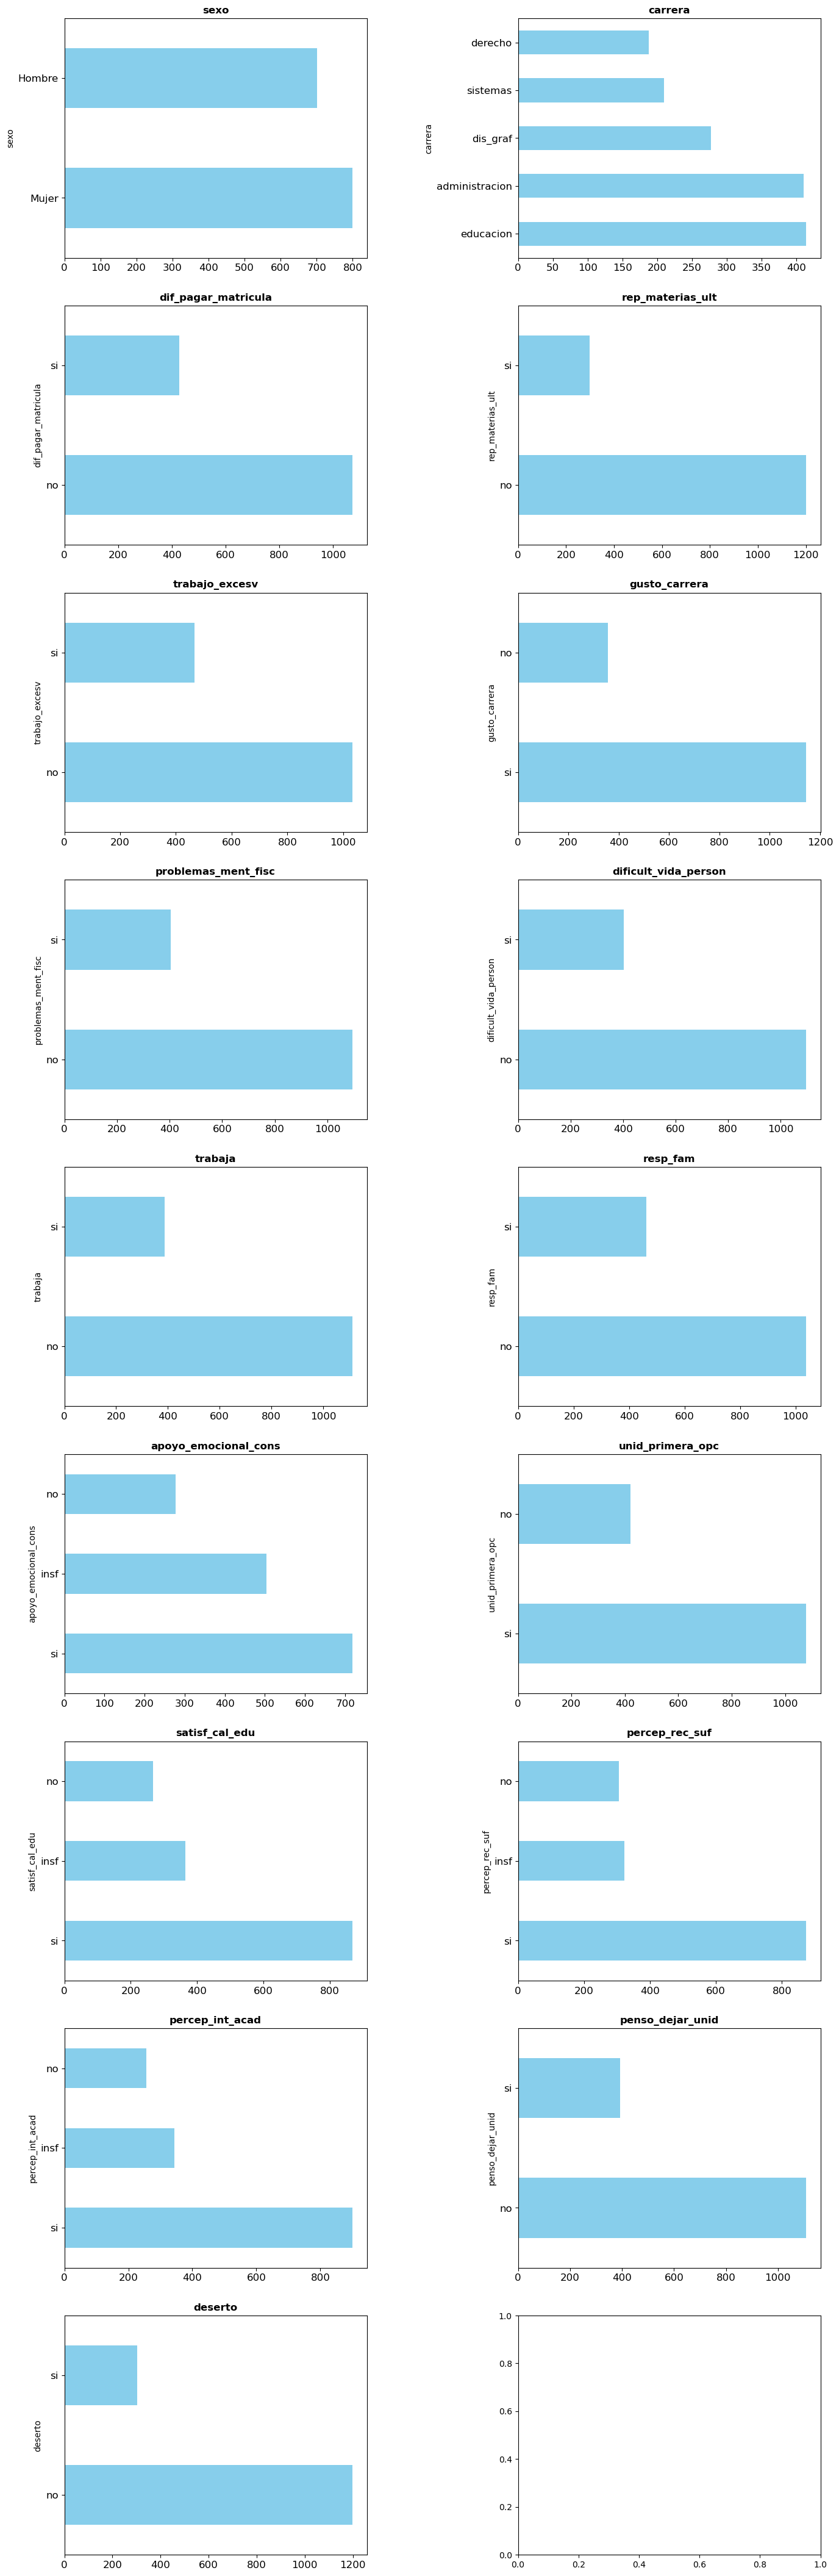

In [10]:
graficos_eda_categoricos(df.select_dtypes('O'))

### EDA Variables numericas 

In [11]:
def estadisticos_cont(num):
    # Calculamos describe (resumen estadistico)
    estadisticos = num.describe().T
    # Añadimos la mediana
    estadisticos['median'] = num.median()
    # Reordenamos para que la mediana este al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    return (estadisticos)

estadisticos_cont(df.select_dtypes('number'))


,count,mean,median,std,min,25%,50%,75%,max
age,1500.0,21.204000,21.0,2.034980,18.0,20.0,21.0,23.0,25.0
dist_casa,1500.0,16.064667,16.0,6.073199,5.0,11.0,16.0,20.0,30.0
beca_inscripcion,1500.0,48.996667,60.0,25.146867,0.0,50.0,60.0,65.0,70.0
beca_colegiatura,1500.0,20.030000,25.0,10.675130,0.0,20.0,25.0,30.0,30.0
cuatrimestre,1500.0,4.987333,5.0,2.443048,1.0,3.0,5.0,7.0,9.0
comod_act_esc,1500.0,6.631333,7.0,2.429682,1.0,5.0,7.0,8.0,10.0
prob_dejar_unid,1500.0,4.872667,4.0,2.836750,1.0,3.0,4.0,8.0,10.0


### Cuantificar el problema

##### ¿Cual es la tasa de abandono?

In [12]:
# El siguiente comando mostrara el porcentaje de abandono de los alumnos 
df.deserto.value_counts(normalize=True)*100

deserto
no    79.866667
si    20.133333
Name: proportion, dtype: float64

##### ¿Hay un tipo de perfil de alumno que abandona la escuela?

In [13]:
# Transformamos la variable de desercion a numerica 
df['deserto'] = df.deserto.map({'no':0, 'si':1})

Analisis por cuatrimestre

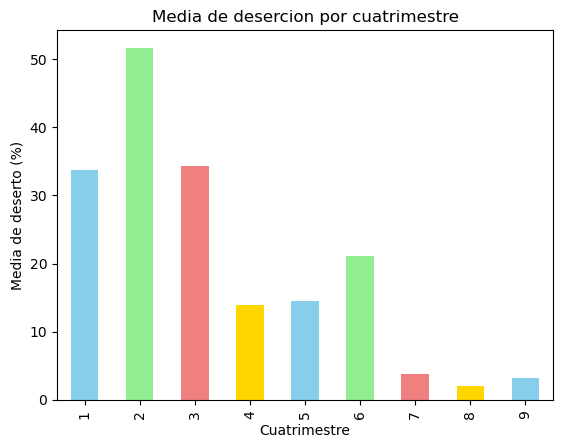

In [14]:
mean_values = df.groupby('cuatrimestre')['deserto'].mean() * 100
# Graficar el resultado 
colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold']
mean_values.plot.bar(color=colors)
plt.xlabel('Cuatrimestre')
plt.ylabel('Media de deserto (%)')
plt.title('Media de desercion por cuatrimestre')
plt.show()

Analisis por genero

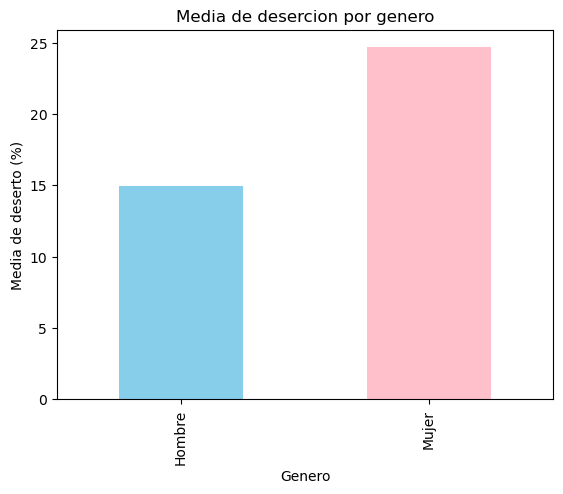

In [15]:
mean_values = df.groupby('sexo')['deserto'].mean() * 100

# Graficar el resultado 
colors = ['skyblue', 'pink']
mean_values.plot.bar(color=colors)
plt.xlabel('Genero')
plt.ylabel('Media de deserto (%)')
plt.title('Media de desercion por genero')
plt.show()

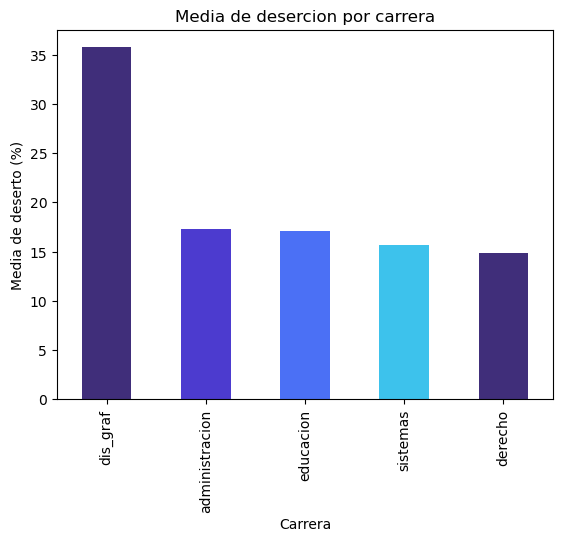

In [16]:
mean_values = df.groupby('carrera')['deserto'].mean().sort_values(ascending=False) * 100

# Graficar el resultado 
colors = ['#402E7A', '#4C3BCF', '#4B70F5', '#3DC2EC']
mean_values.plot.bar(color=colors)
plt.xlabel('Carrera')
plt.ylabel('Media de deserto (%)')
plt.title('Media de desercion por carrera')
plt.show()

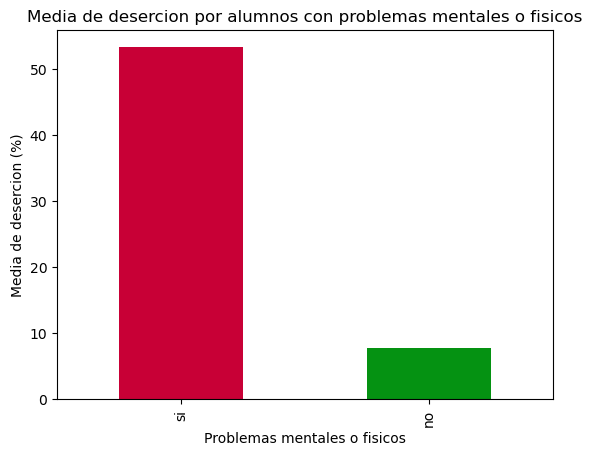

In [17]:
mean_values = df.groupby('problemas_ment_fisc')['deserto'].mean().sort_values(ascending=False) * 100

# Graficar el resultado 
colors = ['#C80036', '#059212']
mean_values.plot.bar(color=colors)
plt.xlabel('Problemas mentales o fisicos')
plt.ylabel('Media de desercion (%)')
plt.title('Media de desercion por alumnos con problemas mentales o fisicos')
plt.show()

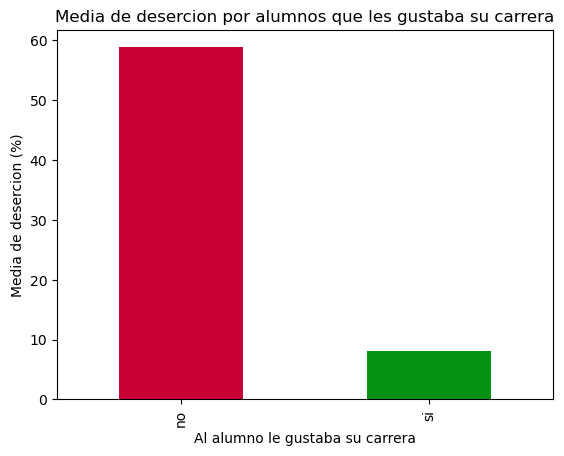

In [18]:
mean_values = df.groupby('gusto_carrera')['deserto'].mean().sort_values(ascending=False) * 100

# Graficar el resultado 
colors = ['#C80036', '#059212']
mean_values.plot.bar(color=colors)
plt.xlabel('Al alumno le gustaba su carrera')
plt.ylabel('Media de desercion (%)')
plt.title('Media de desercion por alumnos que les gustaba su carrera')
plt.show()

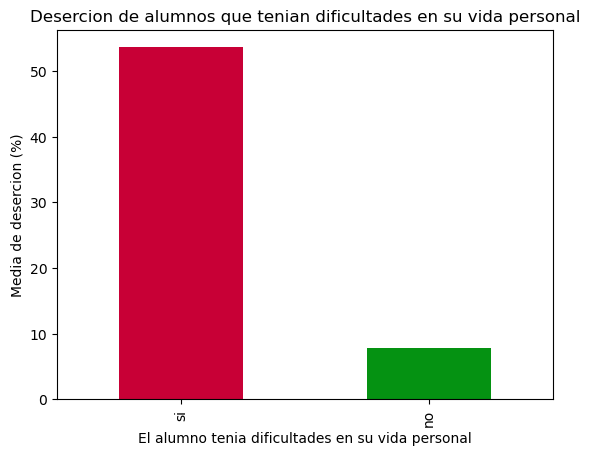

In [19]:
mean_values = df.groupby('dificult_vida_person')['deserto'].mean().sort_values(ascending=False) * 100

# Graficar el resultado 
colors = ['#C80036', '#059212']
mean_values.plot.bar(color=colors)
plt.xlabel('El alumno tenia dificultades en su vida personal')
plt.ylabel('Media de desercion (%)')
plt.title('Desercion de alumnos que tenian dificultades en su vida personal')
plt.show()

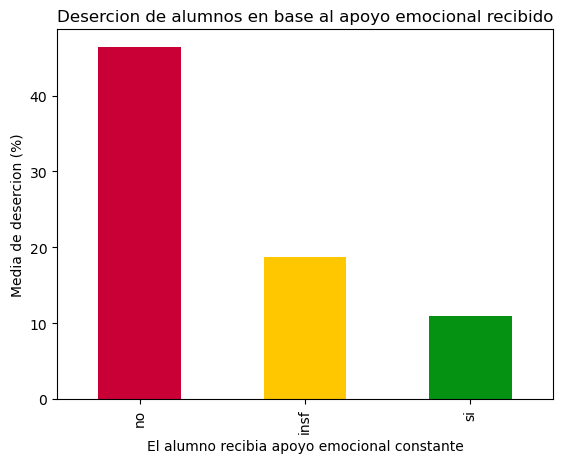

In [20]:
mean_values = df.groupby('apoyo_emocional_cons')['deserto'].mean().sort_values(ascending=False) * 100

# Graficar el resultado 
colors = ['#C80036','#FFC700','#059212',]
mean_values.plot.bar(color=colors)
plt.xlabel('El alumno recibia apoyo emocional constante')
plt.ylabel('Media de desercion (%)')
plt.title('Desercion de alumnos en base al apoyo emocional recibido')
plt.show()

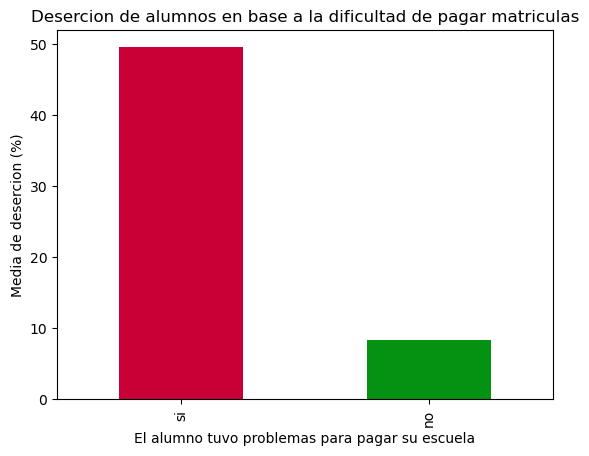

In [21]:
mean_values = df.groupby('dif_pagar_matricula')['deserto'].mean().sort_values(ascending=False) * 100

# Graficar el resultado 
colors = ['#C80036','#059212']
mean_values.plot.bar(color=colors)
plt.xlabel('El alumno tuvo problemas para pagar su escuela')
plt.ylabel('Media de desercion (%)')
plt.title('Desercion de alumnos en base a la dificultad de pagar matriculas')
plt.show()

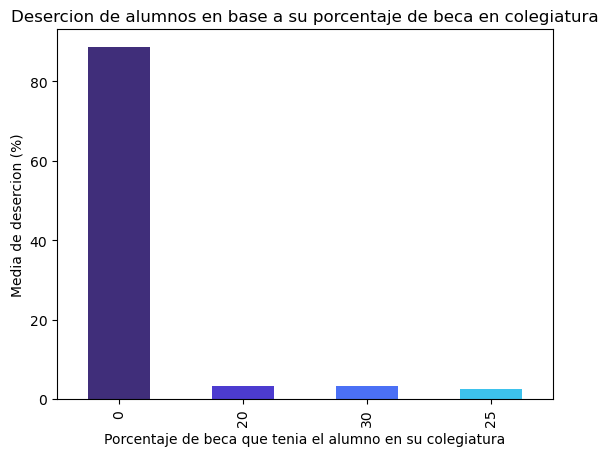

In [22]:
mean_values = df.groupby('beca_colegiatura')['deserto'].mean().sort_values(ascending=False) * 100

# Graficar el resultado 
colors = ['#402E7A', '#4C3BCF', '#4B70F5', '#3DC2EC']
mean_values.plot.bar(color=colors)
plt.xlabel('Porcentaje de beca que tenia el alumno en su colegiatura')
plt.ylabel('Media de desercion (%)')
plt.title('Desercion de alumnos en base a su porcentaje de beca en colegiatura')
plt.show()

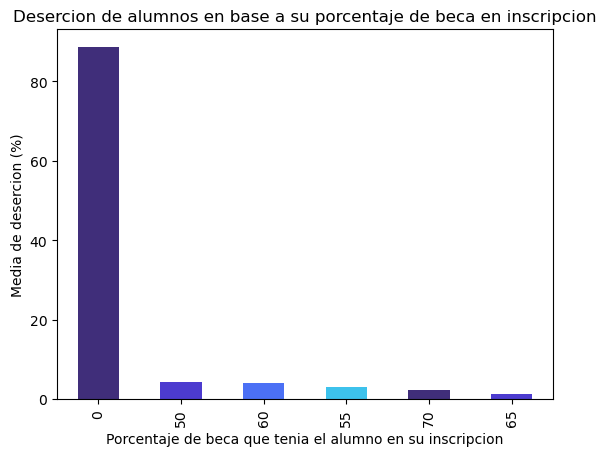

In [23]:
mean_values = df.groupby('beca_inscripcion')['deserto'].mean().sort_values(ascending=False) * 100

# Graficar el resultado 
colors = ['#402E7A', '#4C3BCF', '#4B70F5', '#3DC2EC']
mean_values.plot.bar(color=colors)
plt.xlabel('Porcentaje de beca que tenia el alumno en su inscripcion')
plt.ylabel('Media de desercion (%)')
plt.title('Desercion de alumnos en base a su porcentaje de beca en inscripcion')
plt.show()

### Conclusiones
El perfil promedio del alumno que abandona la escuela:
* Cursa entre el 1er y 3er cuatrimestre
* Es mujer
* Es de la licenciatura en diseño grafico
* Sufre de problemas personales, fisicos o mentales
* No tuvo suficiente apoyo emocional 
* Tuvo dificultades para pagar su educación

### ¿Cual es el impacto economico de esta situacion? 

Considerando que la mayoria de los alumnos abandonaron la escuela empezando o a mitad de su carrera y les restaban de 6 a 4 semestres por acabar podemos calcular el impacto economico que supone este problema

In [24]:
df.deserto.value_counts()

deserto
0    1198
1     302
Name: count, dtype: int64

Si desertaron un total de 302 alumnos a la fecha del estudio podemos calcular su impacto economico con lo siguientes datos proporcionados por la institucion: 
* Alumnos que desertaron: 302
* Costo promedio de colegiatura mensual sin beca: $3500
* Costo promedio de colegiatura mensual con beca: $2500
* Costo promedio de inscripcion cuatrimestral sin beca: $3500
* Costo promedio de inscripcion cuatrimestral con beca: $1400
* Cuatrimestres que le restaban a los alumnos: 4 - 6

##### Mejor escenario
Si consideramos que los alumnos que desertaron tenian beca en la inscricion y en sus mensualidad y que solo les restaban 4 cuatrimestres por terminar la escuela habria perdido:

*(2500 * 4) + (1400 * 4) * 302 =*

* $1,701,200 pesos de esos alumnos que se hubieran ahorrado si completaban su carrera

Sin contar otros gastos como Ingles, seguro de estudios, plataformas, etc.

##### Peor escenario 
Por el contrario si consideramos que los alumnos que se fueron debian pagar su colegiatura completa sin descuento de beca por 6 cuatrimestres restantes la escuela habria perdido:

*(3500 * 6) + (3500 * 6) * 302 =*

* $6,363,000 pesos de esos alumnos que se hubieran ahorrado si completaban su carrera

Sin contar otros gastos como Ingles, seguro de estudios, plataformas, etc.

## Fase 2: Modelo predictivo con Machine Learning

In [25]:
# Guardamos una copia que utilizaremos para el modelo predictivo
df_ml = df.copy()
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1500 entries, 1 to 1500
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sexo                  1500 non-null   object
 1   age                   1500 non-null   int64 
 2   dist_casa             1500 non-null   int64 
 3   beca_inscripcion      1500 non-null   int64 
 4   beca_colegiatura      1500 non-null   int64 
 5   carrera               1500 non-null   object
 6   cuatrimestre          1500 non-null   int64 
 7   dif_pagar_matricula   1500 non-null   object
 8   rep_materias_ult      1500 non-null   object
 9   trabajo_excesv        1500 non-null   object
 10  gusto_carrera         1500 non-null   object
 11  problemas_ment_fisc   1500 non-null   object
 12  dificult_vida_person  1500 non-null   object
 13  trabaja               1500 non-null   object
 14  resp_fam              1500 non-null   object
 15  apoyo_emocional_cons  1500 non-null   objec

Debemos transformar las variables cualitativas a numericas para que el modelo pueda manipular los datos de manera correcta 

In [26]:
from sklearn.preprocessing import OneHotEncoder
 
# Agrupamos las variables categoricas
cualitativas = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse_output = False)

# Entrenamos
ohe.fit(cualitativas)

# Aplicamos
cat_ohe = ohe.transform(cualitativas)

# Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns= ohe.get_feature_names_out(input_features = cualitativas.columns)).reset_index(drop=True)



In [27]:
cat_ohe

,sexo_Hombre,sexo_Mujer,carrera_administracion,carrera_derecho,carrera_dis_graf,carrera_educacion,carrera_sistemas,dif_pagar_matricula_no,dif_pagar_matricula_si,rep_materias_ult_no,...,satisf_cal_edu_no,satisf_cal_edu_si,percep_rec_suf_insf,percep_rec_suf_no,percep_rec_suf_si,percep_int_acad_insf,percep_int_acad_no,percep_int_acad_si,penso_dejar_unid_no,penso_dejar_unid_si
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1496,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1497,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1498,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Seleccionamos las variables cuantitativas para juntarlas con las otras que acabamos de hacer

In [28]:
num = df.select_dtypes('number').reset_index(drop=True)

In [29]:
# Unimos todas en un dataframe final
df_ml = pd.concat([cat_ohe, num], axis=1)
df_ml


,sexo_Hombre,sexo_Mujer,carrera_administracion,carrera_derecho,carrera_dis_graf,carrera_educacion,carrera_sistemas,dif_pagar_matricula_no,dif_pagar_matricula_si,rep_materias_ult_no,...,penso_dejar_unid_no,penso_dejar_unid_si,age,dist_casa,beca_inscripcion,beca_colegiatura,cuatrimestre,comod_act_esc,prob_dejar_unid,deserto
0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,24,19,0,0,4,1,9,0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,20,17,0,0,1,3,8,1
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,25,25,0,0,2,4,10,1
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,23,23,0,0,2,1,10,1
4,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,23,16,0,0,6,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,18,12,65,20,5,7,3,0
1496,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,19,5,65,20,5,9,4,0
1497,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,22,6,60,20,9,8,3,0
1498,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,21,16,60,25,6,7,1,0


#### Diseño de la modelizacion

Separacion de las variables predictorias (x) y objetivo (y)

La variable que intentamos predecir es la y, que es la que nos dice si el alumno deserto o no.

Mientras que la variable x es la que nos ayudara a predecir en base a todas las demas que no son la de desercion

In [30]:
y = df_ml ['deserto']
x = df_ml.drop(columns='deserto')

In [31]:
# Separacion de train y test
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3)

Entrenamiento sobre train

In [32]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos
modelo_predictivo = DecisionTreeClassifier(max_depth = 4)

# Entrenamos el modelo
modelo_predictivo.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=4)

Prediccion y validacion sobre test

In [33]:
pred = modelo_predictivo.predict_proba(test_x)[:, 1]
pred[:20]

array([0.0094518 , 0.        , 0.91150442, 0.0094518 , 0.91150442,
       0.91150442, 0.        , 0.0617284 , 0.0094518 , 1.        ,
       0.0094518 , 0.91150442, 0.0094518 , 0.0094518 , 0.0094518 ,
       0.0094518 , 0.02272727, 0.0094518 , 0.91150442, 0.91150442])

Evaluacion

In [34]:
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y, pred)

0.8796198210922787

Interpretacion

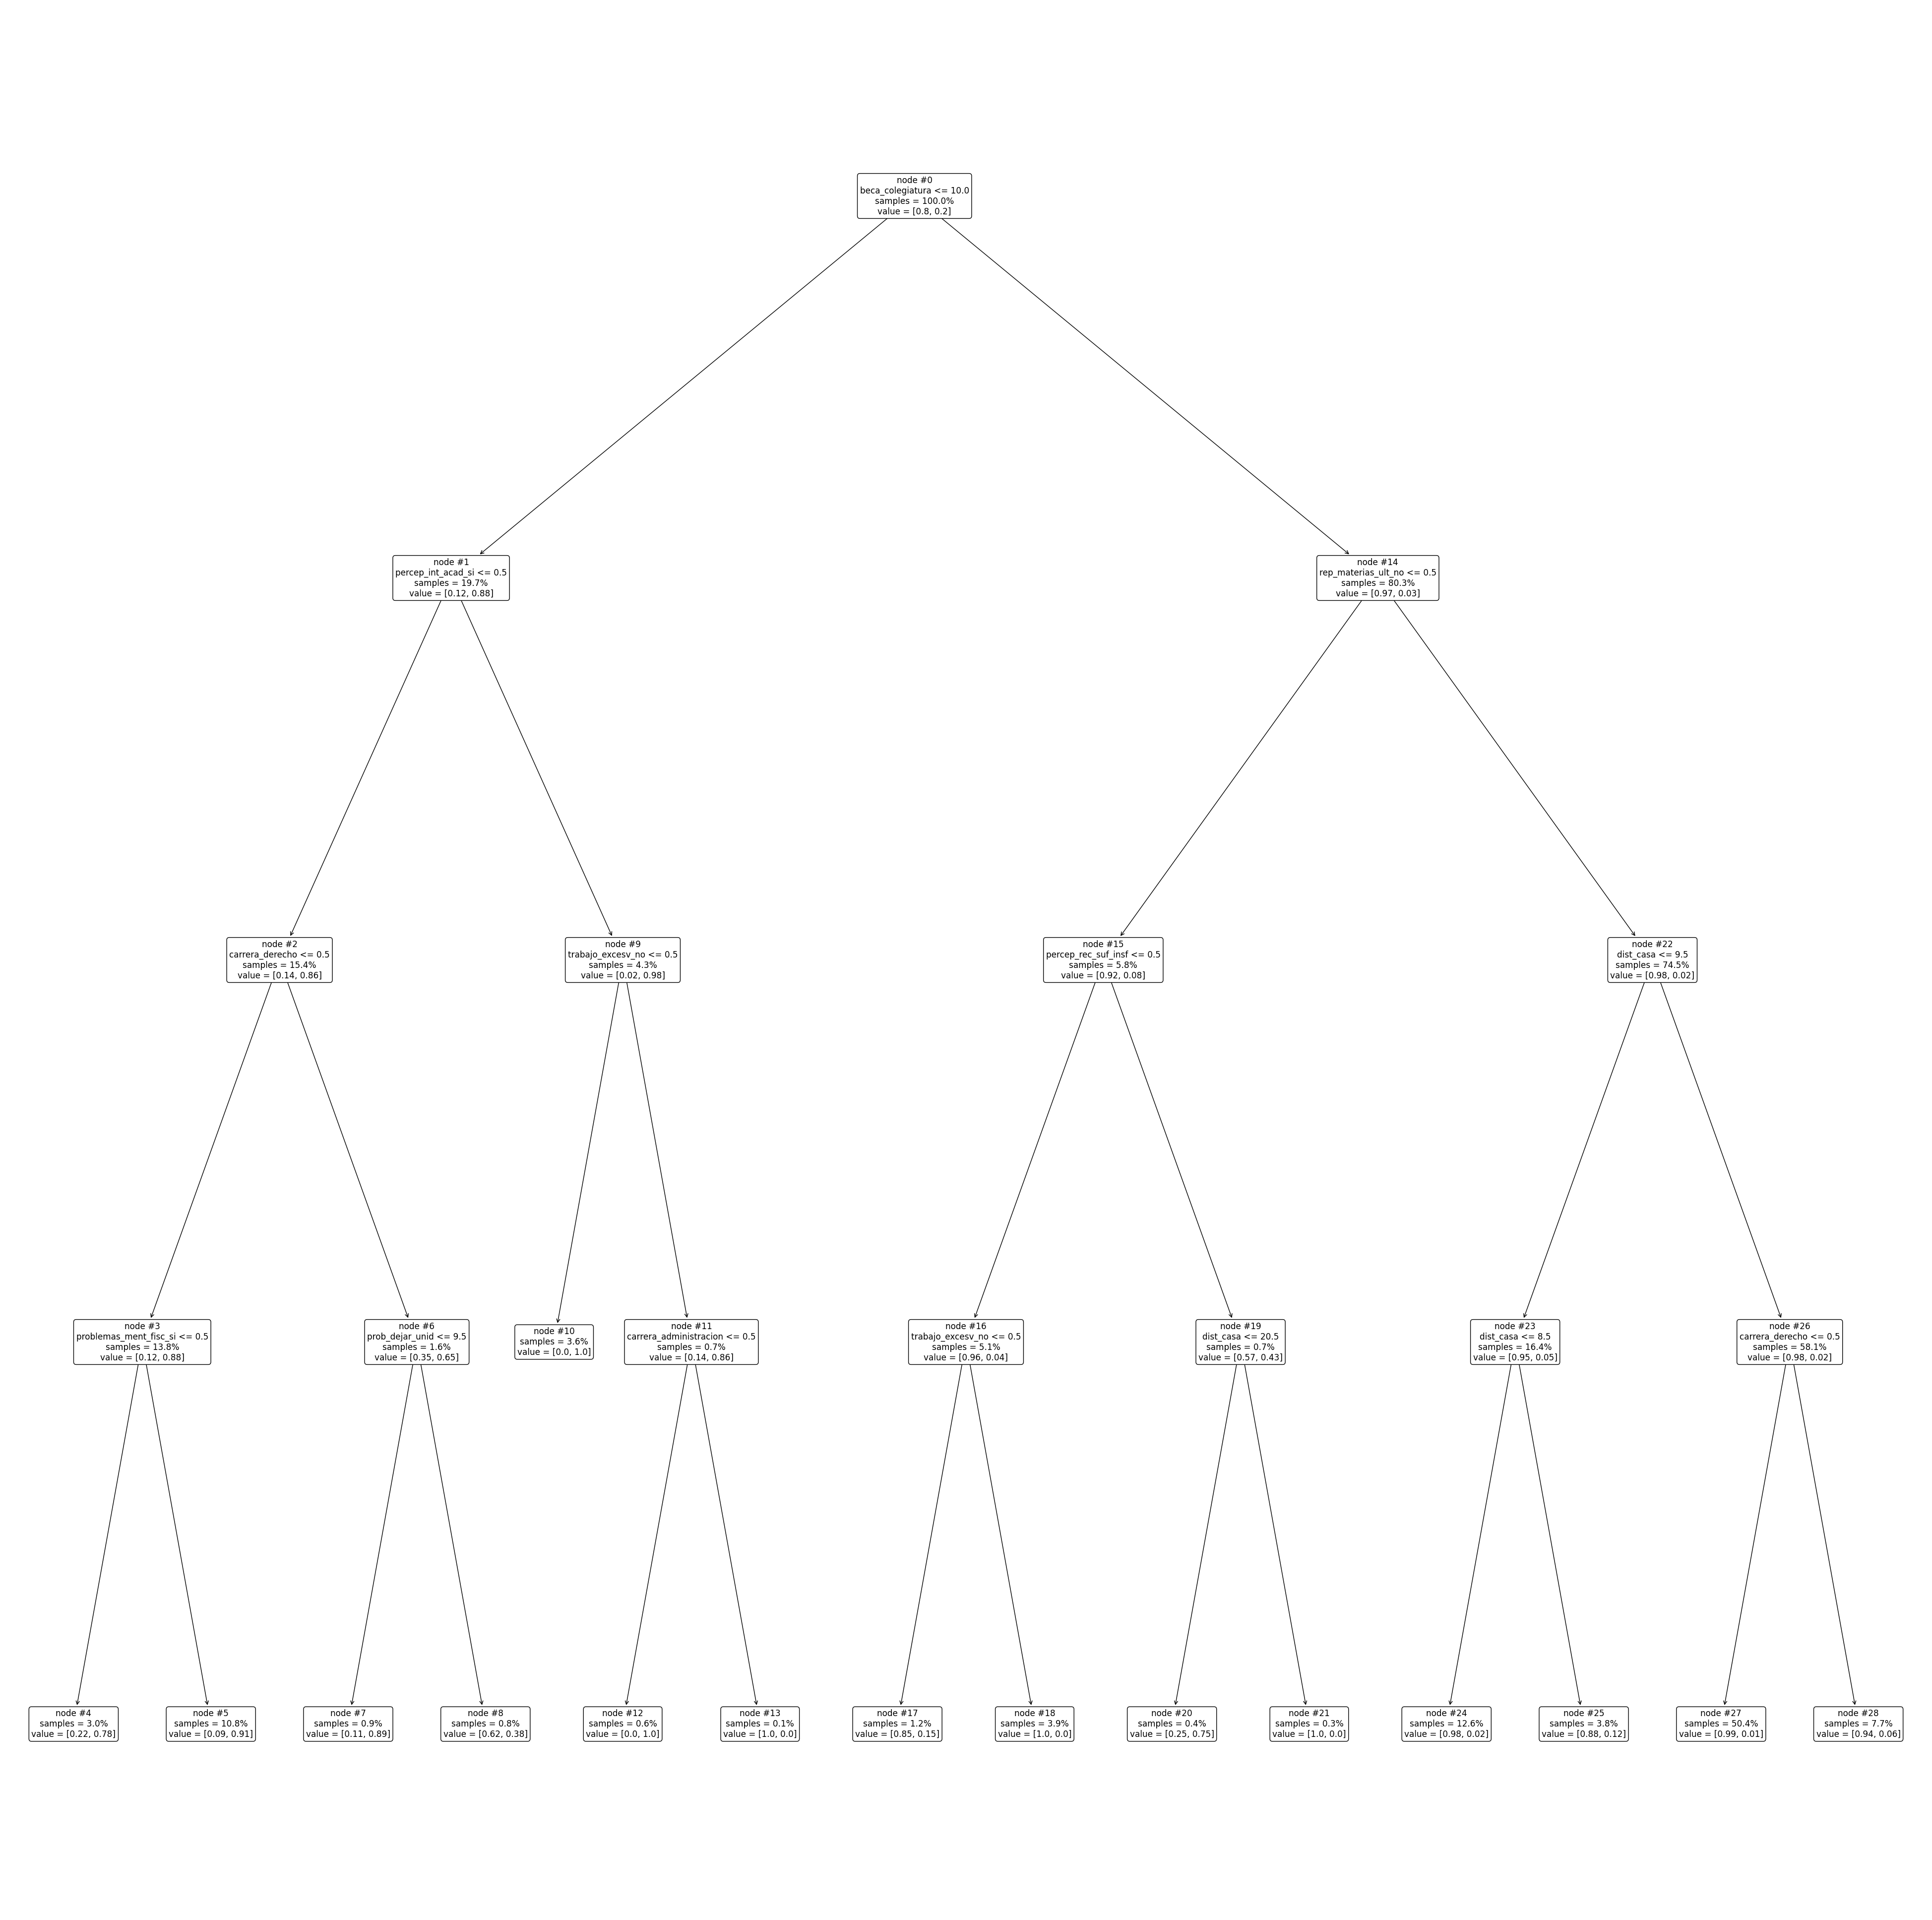

In [35]:
from sklearn.tree import plot_tree

plt.figure(figsize=(50,50))

plot_tree (modelo_predictivo,
           feature_names = test_x.columns,
           impurity = False,
           node_ids = True,
           proportion = True,
           rounded = True,
           precision = 2 );

Podemos ver las variables que han tenido mas peso en el entrenamiento del arbol de decision 

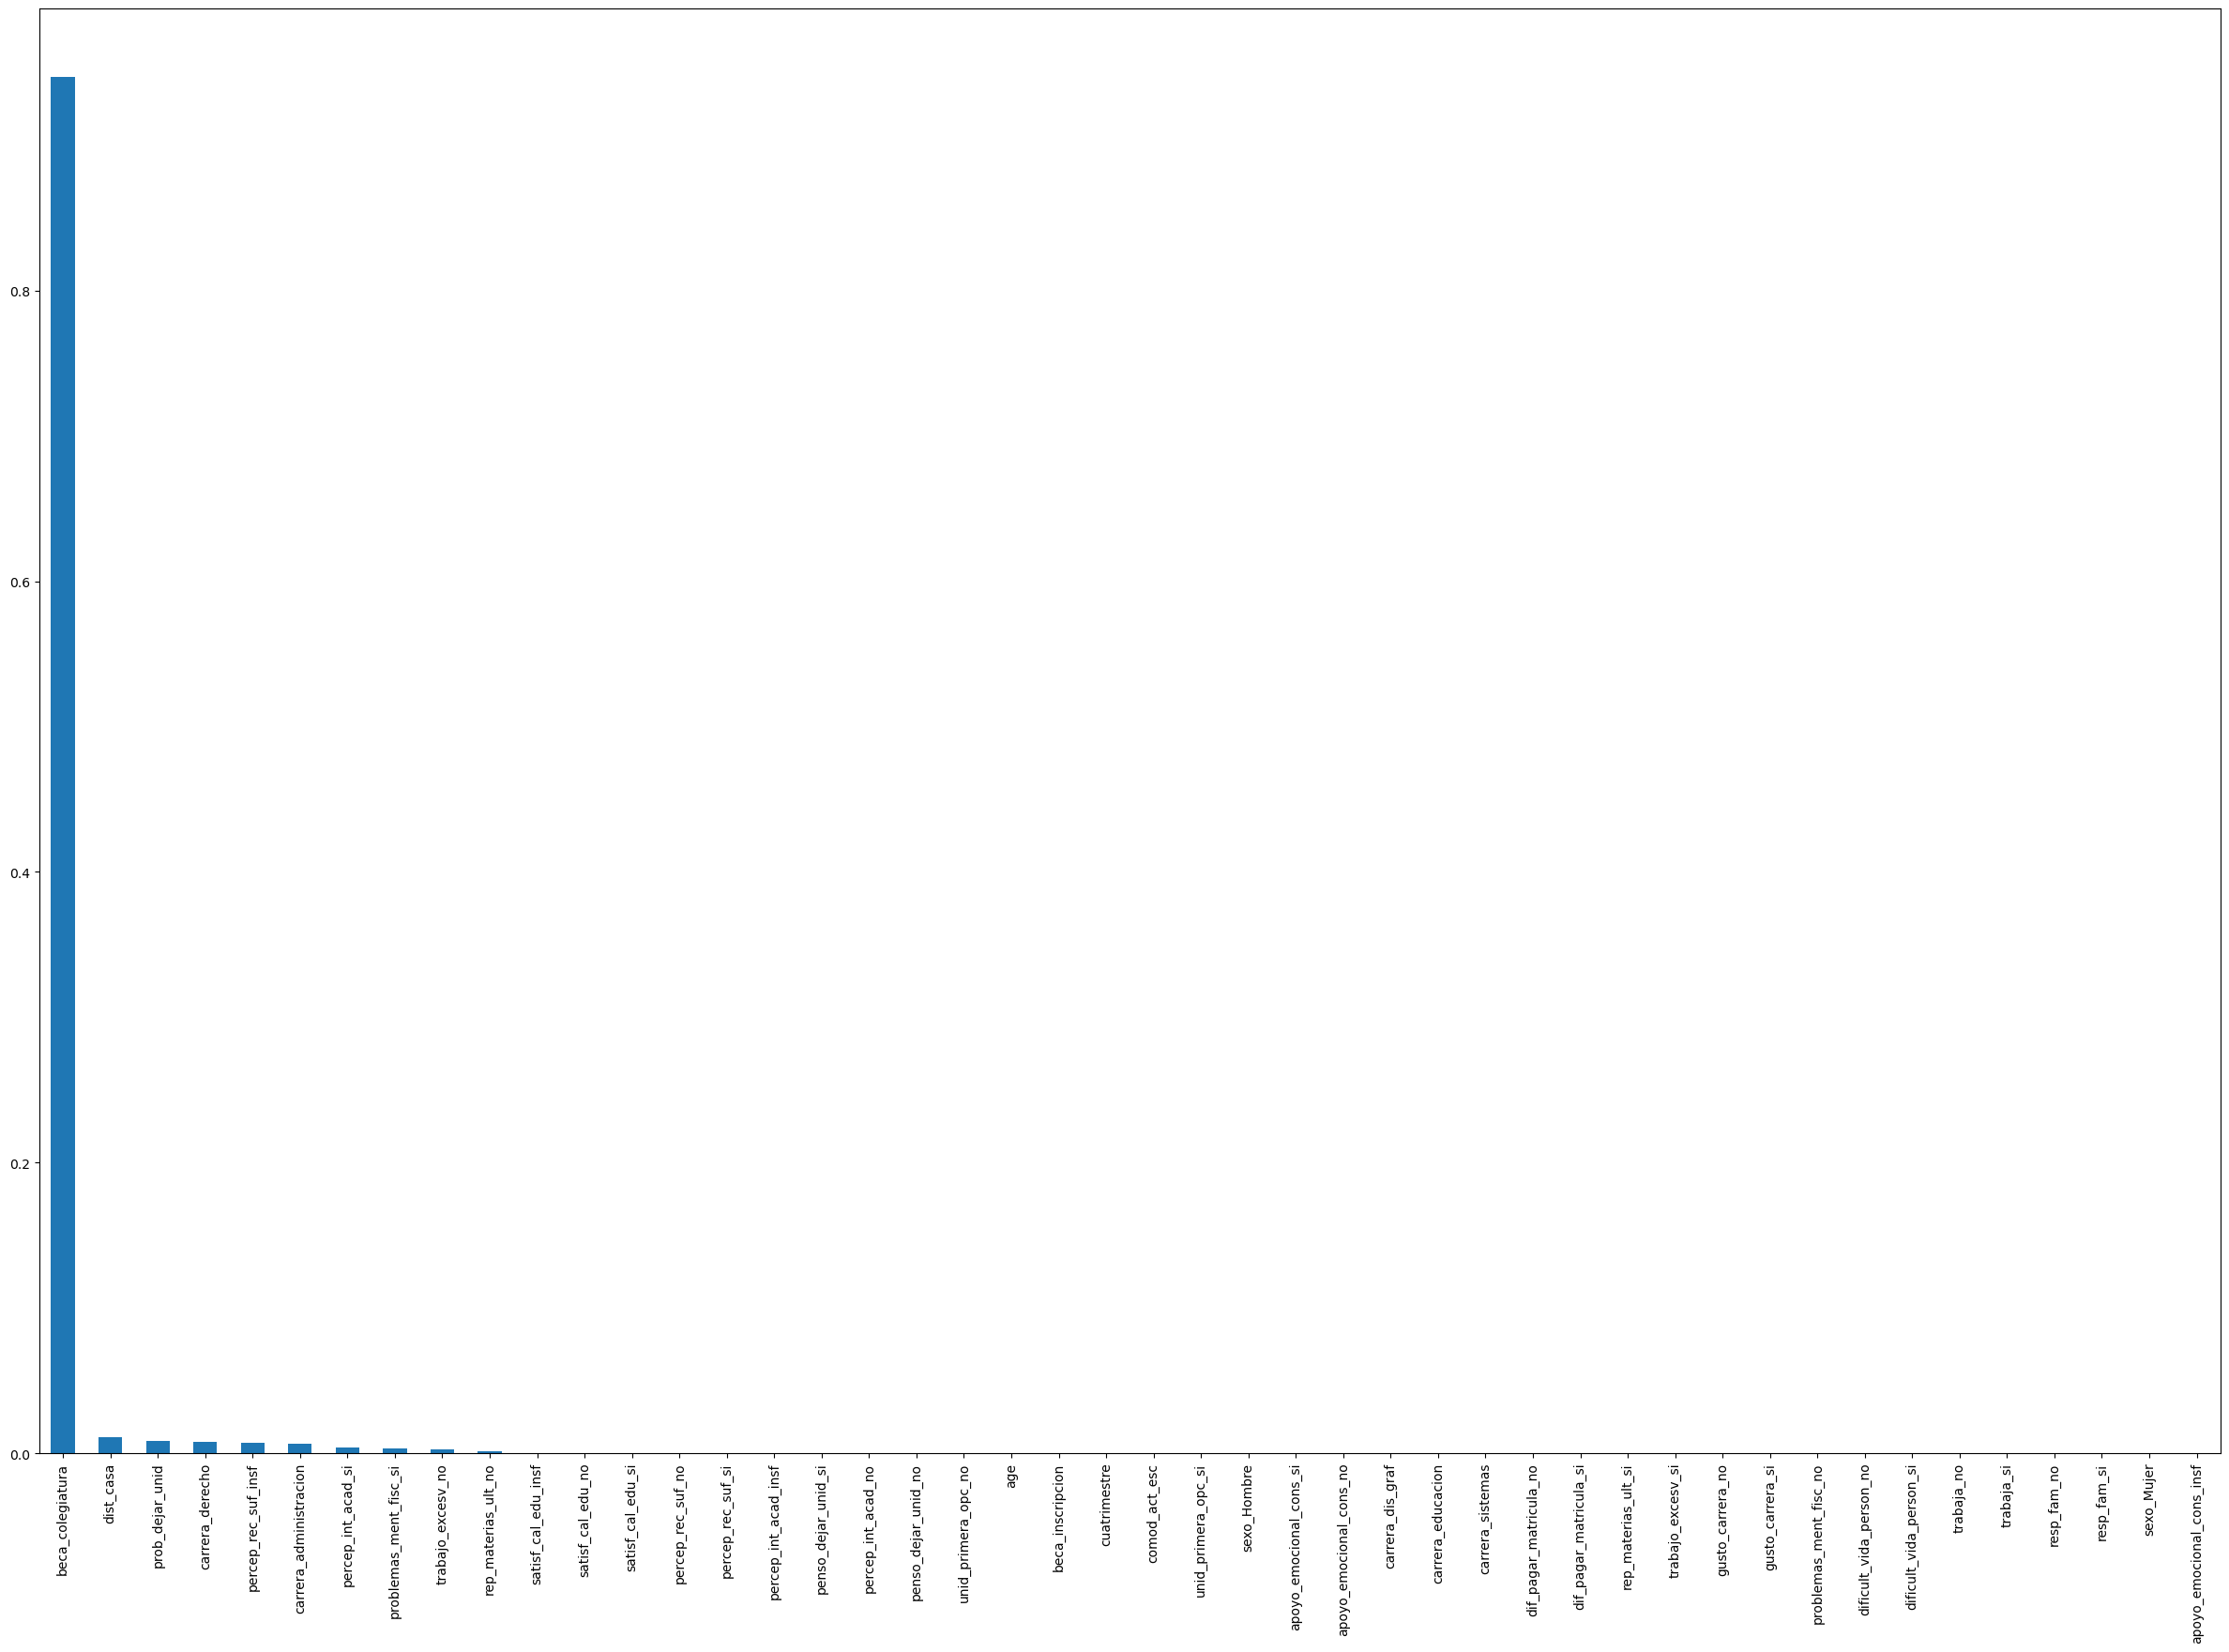

In [36]:
pd.Series(modelo_predictivo.feature_importances_,index = test_x.columns).sort_values(ascending=False).plot(kind = 'bar', figsize = (30, 20));

##### Conclusiones: 
Como vemos el factor mas importante que decide si un alumno se queda es si cuenta con beca de inscripcion. Tambien podemos observar en mucha menor medida cosas relacionadas con los factores academicos e institucionales

In [37]:
df['prob_desercion'] = modelo_predictivo.predict_proba(df_ml.drop(columns = 'deserto'))[:, 1]
df

,sexo,age,dist_casa,beca_inscripcion,beca_colegiatura,carrera,cuatrimestre,dif_pagar_matricula,rep_materias_ult,trabajo_excesv,...,apoyo_emocional_cons,unid_primera_opc,comod_act_esc,satisf_cal_edu,percep_rec_suf,percep_int_acad,penso_dejar_unid,prob_dejar_unid,deserto,prob_desercion
id,,,,,,,,,,,,,,,,,,,,,
1,Mujer,24,19,0,0,administracion,4,si,si,si,...,si,no,1,no,no,no,si,9,0,0.781250
2,Mujer,20,17,0,0,administracion,1,no,si,no,...,insf,no,3,no,insf,si,si,8,1,0.000000
3,Mujer,25,25,0,0,dis_graf,2,si,no,si,...,no,no,4,no,no,no,no,10,1,0.911504
4,Mujer,23,23,0,0,dis_graf,2,si,si,no,...,no,no,1,insf,no,insf,no,10,1,0.911504
5,Mujer,23,16,0,0,educacion,6,si,si,si,...,insf,no,4,insf,no,insf,si,9,0,0.911504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,Mujer,18,12,65,20,sistemas,5,no,no,no,...,si,si,7,si,si,si,no,3,0,0.009452
1497,Mujer,19,5,65,20,administracion,5,no,no,no,...,si,si,9,si,si,insf,no,4,0,0.022727
1498,Hombre,22,6,60,20,derecho,9,no,no,si,...,si,si,8,si,si,si,no,3,0,0.022727


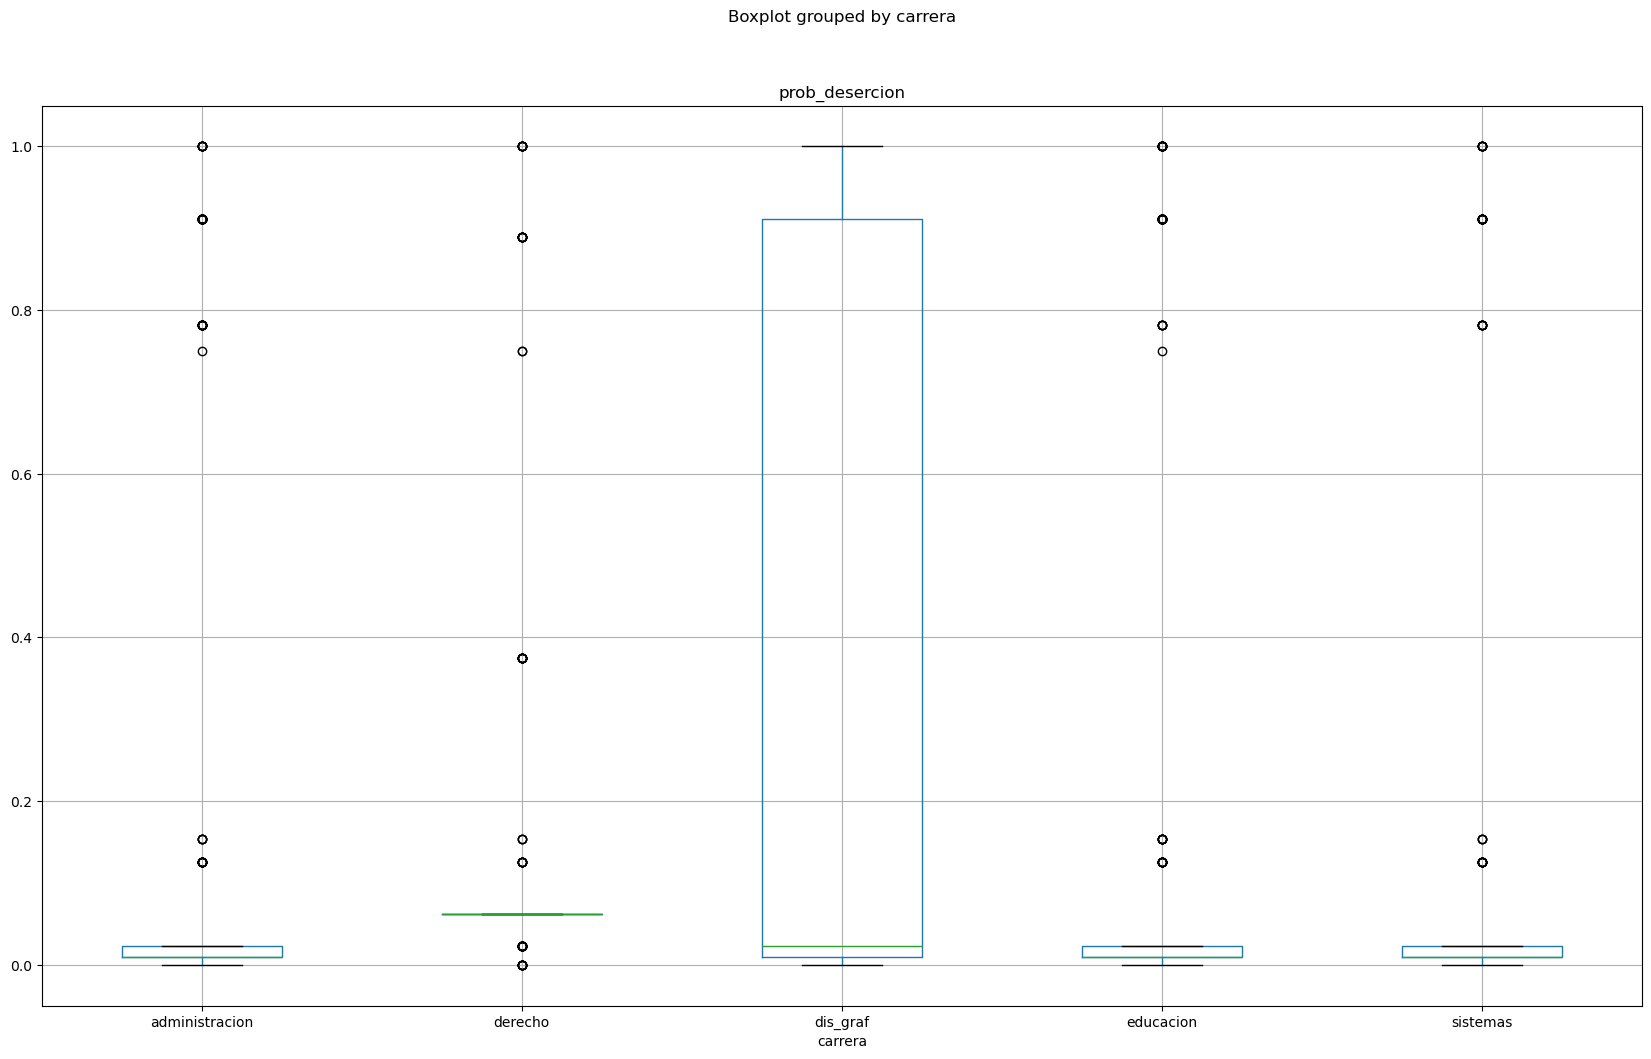

In [38]:
df.boxplot(column='prob_desercion', by='carrera', figsize=(20, 12));

In [39]:
# Exportamos a xlsx
df.to_excel('archivo_exportado.xlsx', index=False)